In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


,date,open,high,low,close,volume,average,barcount
0,2020-06-01 04:00:00,305.00,305.31,303.58,303.92,1241,304.104,351
1,2020-06-01 04:10:00,303.84,303.90,302.82,303.14,3936,303.391,1388
2,2020-06-01 04:20:00,303.18,303.26,302.45,303.15,2886,302.944,666
3,2020-06-01 04:30:00,303.26,303.55,303.02,303.46,1603,303.321,373
4,2020-06-01 04:40:00,303.46,303.53,303.18,303.53,1397,303.338,326
...,...,...,...,...,...,...,...,...
6139,2020-08-28 19:10:00,350.91,350.93,350.88,350.93,38,350.903,13
6140,2020-08-28 19:20:00,350.91,350.99,350.91,350.99,28,350.952,16
6141,2020-08-28 19:30:00,350.95,350.96,350.90,350.95,63,350.937,30
6142,2020-08-28 19:40:00,350.94,350.98,350.94,350.96,62,350.962,18


,date,open,high,low,close,volume,average,barcount
0,2020-06-01 04:00:00,305.00,305.31,303.58,303.92,1241,304.104,351
1,2020-06-01 04:10:00,303.84,303.90,302.82,303.14,3936,303.391,1388
2,2020-06-01 04:20:00,303.18,303.26,302.45,303.15,2886,302.944,666
3,2020-06-01 04:30:00,303.26,303.55,303.02,303.46,1603,303.321,373
4,2020-06-01 04:40:00,303.46,303.53,303.18,303.53,1397,303.338,326
...,...,...,...,...,...,...,...,...
6139,2020-08-28 19:10:00,350.91,350.93,350.88,350.93,38,350.903,13
6140,2020-08-28 19:20:00,350.91,350.99,350.91,350.99,28,350.952,16
6141,2020-08-28 19:30:00,350.95,350.96,350.90,350.95,63,350.937,30
6142,2020-08-28 19:40:00,350.94,350.98,350.94,350.96,62,350.962,18


Test Statistic                   -1.336426
p-value                           0.612347
#Lags Used                        1.000000
Number of Observations Used    4913.000000
Critical Value (1%)              -3.431682
Critical Value (5%)              -2.862128
Critical Value (10%)             -2.567083
dtype: float64

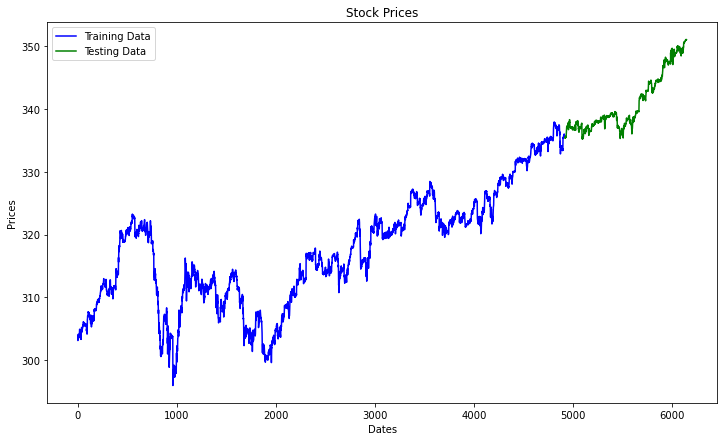

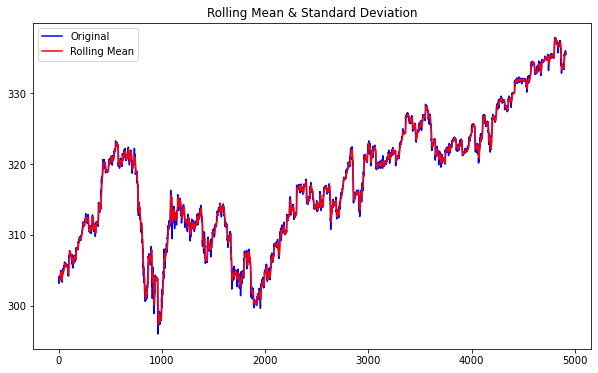

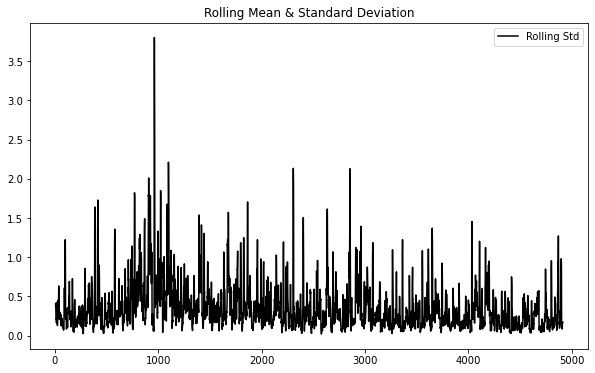

In [53]:
df = pd.read_csv('SPY_bar_sample_10min.csv')
display(df)
dfug = df
display(dfug)
train_data, test_data = dfug.iloc[0:int(len(df)*0.8), :], dfug.iloc[int(len(df)*0.8):, :]
plt.figure(figsize=(12,7))
plt.title('Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
plt.legend()

window = 7
train_series = train_data['close']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

fig = plt.figure(figsize=(10, 6))
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');




dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
display(dfoutput)

0       303.92
1       303.14
2       303.15
3       303.46
4       303.53
         ...  
6139    350.93
6140    350.99
6141    350.95
6142    350.96
6143    350.98
Name: close, Length: 6144, dtype: float64

6044 100


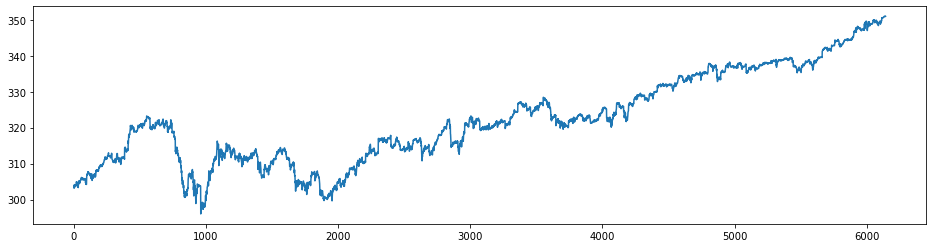

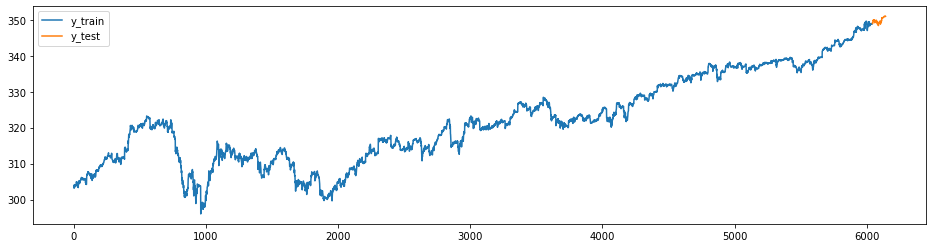

In [69]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

y = df['close']
display(y)
fig, ax = plot_ys(y)

y_train, y_test = temporal_train_test_split(y, test_size=100)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])



AutoARIMA
0.001673349530597874


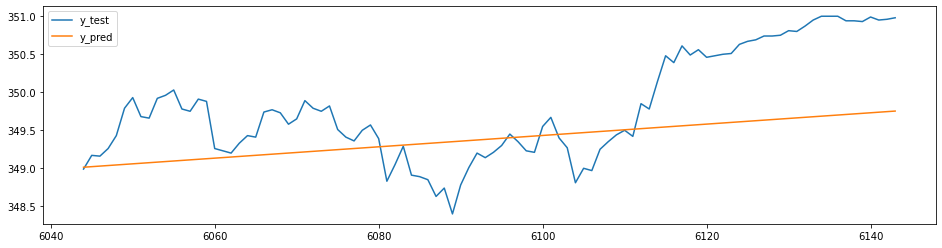

In [72]:
fh = np.arange(len(y_test)) + 1
# print(fh)
# fh = np.arange(5)
y_pred = np.repeat(y_train.iloc[-1], len(fh))
y_pred = pd.Series(y_pred, index=y_train.index[-1] + fh)
# plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

# print("Naive")
# from sktime.forecasting.naive import NaiveForecaster
# forecaster = NaiveForecaster(strategy="last")
# forecaster.fit(y_train)
# y_last = forecaster.predict(fh)
# plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# smape_loss(y_last, y_test)

print("AutoARIMA")
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=2, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys( y_test, y_pred, labels=[ "y_test", "y_pred"])
print(smape_loss(y_pred, y_test))

# print("Neightbors")
# from sktime.forecasting.compose import ReducedRegressionForecaster
# from sklearn.neighbors import KNeighborsRegressor
# regressor = KNeighborsRegressor(n_neighbors=1)
# forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=6, strategy="recursive")
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)
# plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# smape_loss(y_test, y_pred)

# print("Exponential Smoothing")
# from sktime.forecasting.exp_smoothing import ExponentialSmoothing
# forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=200)
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)
# plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# print(smape_loss(y_test, y_pred))

# from sktime.forecasting.compose import EnsembleForecaster
# forecaster = EnsembleForecaster([
#     ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=4)),
#     ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=34)),
#     ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=24))
# ])
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)
# plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# smape_loss(y_test, y_pred)

# from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter
# forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
# param_grid = {"window_length": [5, 10, 15]}
# # we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
# cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.1))
# gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
# gscv.fit(y_train)
# y_pred = gscv.predict(fh)
# plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# smape_loss(y_test, y_pred)

# from sktime.forecasting.theta import ThetaForecaster
# forecaster = ThetaForecaster(sp=24)
# forecaster.fit(y_train)
# alpha = 0.5  # 95% prediction intervals
# y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
# smape_loss(y_test, y_pred)

# fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
# plt.legend();